**🎥 MOVIE SUCCESS PREDICTION PROJECT**

**Machine Learning – Classification (Hit vs Flop)**

This project predicts whether a movie will be a **commercial success (Hit)** or **failure (Flop)** using movies data.  

The goal is to help movie studios and investors make data-driven decisions before a movie's release.  

By analyzing historical movie data and training multiple classification models, estimate the probability of success for upcoming films based on features like budget, genre, cast, and ratings.

**Import Libraries & Load Dataset**

In [85]:
# Step 1.1 - Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv("movies_dataset.csv")
print(df.head(10).to_string())

   MovieID                         Title        Genre  ReleaseYear ReleaseDate Country    BudgetUSD  US_BoxOfficeUSD  Global_BoxOfficeUSD  Opening_Day_SalesUSD  One_Week_SalesUSD  IMDbRating  RottenTomatoesScore  NumVotesIMDb  NumVotesRT         Director           LeadActor
0        1          Might toward capital       Comedy         2003  28-09-2003   China   6577427.79       6613685.82          15472035.66            1778530.85         3034053.32         6.2                   58          7865       10596   Kristina Moore     Brian Mccormick
1        2         He however experience       Comedy         1988  14-02-1988     USA   1883810.10       1930949.15           3637731.12             247115.74          831828.84         5.2                   44          1708         220  Benjamin Hudson         Ashley Pena
2        3  Star responsibility politics       Comedy         1971  02-11-1971     USA   2468079.29       4186694.69           7165111.24             878453.95         2171405

Understand Dataset Structure

In [87]:
df.shape

(999999, 17)

In [90]:
df.columns


Index(['MovieID', 'Title', 'Genre', 'ReleaseYear', 'ReleaseDate', 'Country',
       'BudgetUSD', 'US_BoxOfficeUSD', 'Global_BoxOfficeUSD',
       'Opening_Day_SalesUSD', 'One_Week_SalesUSD', 'IMDbRating',
       'RottenTomatoesScore', 'NumVotesIMDb', 'NumVotesRT', 'Director',
       'LeadActor'],
      dtype='object')

In [ ]:
df.dtypes

MovieID                   int64
Title                    object
Genre                    object
ReleaseYear               int64
ReleaseDate              object
Country                  object
BudgetUSD               float64
US_BoxOfficeUSD         float64
Global_BoxOfficeUSD     float64
Opening_Day_SalesUSD    float64
One_Week_SalesUSD       float64
IMDbRating              float64
RottenTomatoesScore       int64
NumVotesIMDb              int64
NumVotesRT                int64
Director                 object
LeadActor                object
dtype: object

**Data Cleaning**

In [93]:
df.isnull().sum()

MovieID                 0
Title                   0
Genre                   0
ReleaseYear             0
ReleaseDate             0
Country                 0
BudgetUSD               0
US_BoxOfficeUSD         0
Global_BoxOfficeUSD     0
Opening_Day_SalesUSD    0
One_Week_SalesUSD       0
IMDbRating              0
RottenTomatoesScore     0
NumVotesIMDb            0
NumVotesRT              0
Director                0
LeadActor               0
dtype: int64

In [94]:
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


In [96]:
# Check for extra spaces in column names
df.columns = df.columns.str.strip()

# Convert ReleaseDate to proper datetime format (if it's not already)
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'], errors='coerce')

# Confirm conversion
print(df['ReleaseDate'].head())

# Check data types again
df.dtypes

0   2003-09-28
1   1988-02-14
2   1971-11-02
3   1998-08-06
4   2021-12-17
Name: ReleaseDate, dtype: datetime64[ns]


MovieID                          int64
Title                           object
Genre                           object
ReleaseYear                      int64
ReleaseDate             datetime64[ns]
Country                         object
BudgetUSD                      float64
US_BoxOfficeUSD                float64
Global_BoxOfficeUSD            float64
Opening_Day_SalesUSD           float64
One_Week_SalesUSD              float64
IMDbRating                     float64
RottenTomatoesScore              int64
NumVotesIMDb                     int64
NumVotesRT                       int64
Director                        object
LeadActor                       object
dtype: object

Basic Statistics

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MovieID,999999.0,5.000000e+05,2.886750e+05,1.00,250000.50,500000.00,7.499995e+05,9.999990e+05
ReleaseYear,999999.0,1.998001e+03,1.926086e+01,1950.00,1984.00,2001.00,2.014000e+03,2.025000e+03
BudgetUSD,999999.0,9.802824e+06,2.249421e+07,100000.00,1190510.79,3265789.51,9.002791e+06,3.000000e+08
US_BoxOfficeUSD,999999.0,1.496163e+07,3.879403e+07,40025.47,1489805.19,4388875.59,1.287606e+07,1.018198e+09
Global_BoxOfficeUSD,999999.0,2.720625e+07,6.954294e+07,100000.00,2762369.99,8090223.36,2.355245e+07,1.499497e+09
Opening_Day_SalesUSD,999999.0,2.992745e+06,8.132438e+06,4050.47,279026.24,838722.12,2.510360e+06,2.957511e+08
One_Week_SalesUSD,999999.0,7.483442e+06,1.955337e+07,16507.42,738314.53,2179436.34,6.415143e+06,5.795551e+08
IMDbRating,999999.0,6.494788e+00,1.485606e+00,1.00,5.50,6.50,7.500000e+00,1.000000e+01
RottenTomatoesScore,999999.0,6.477643e+01,1.759247e+01,0.00,53.00,65.00,7.700000e+01,1.000000e+02
NumVotesIMDb,999999.0,9.137184e+03,2.492236e+04,100.00,1083.00,2983.00,8.192000e+03,1.000000e+06


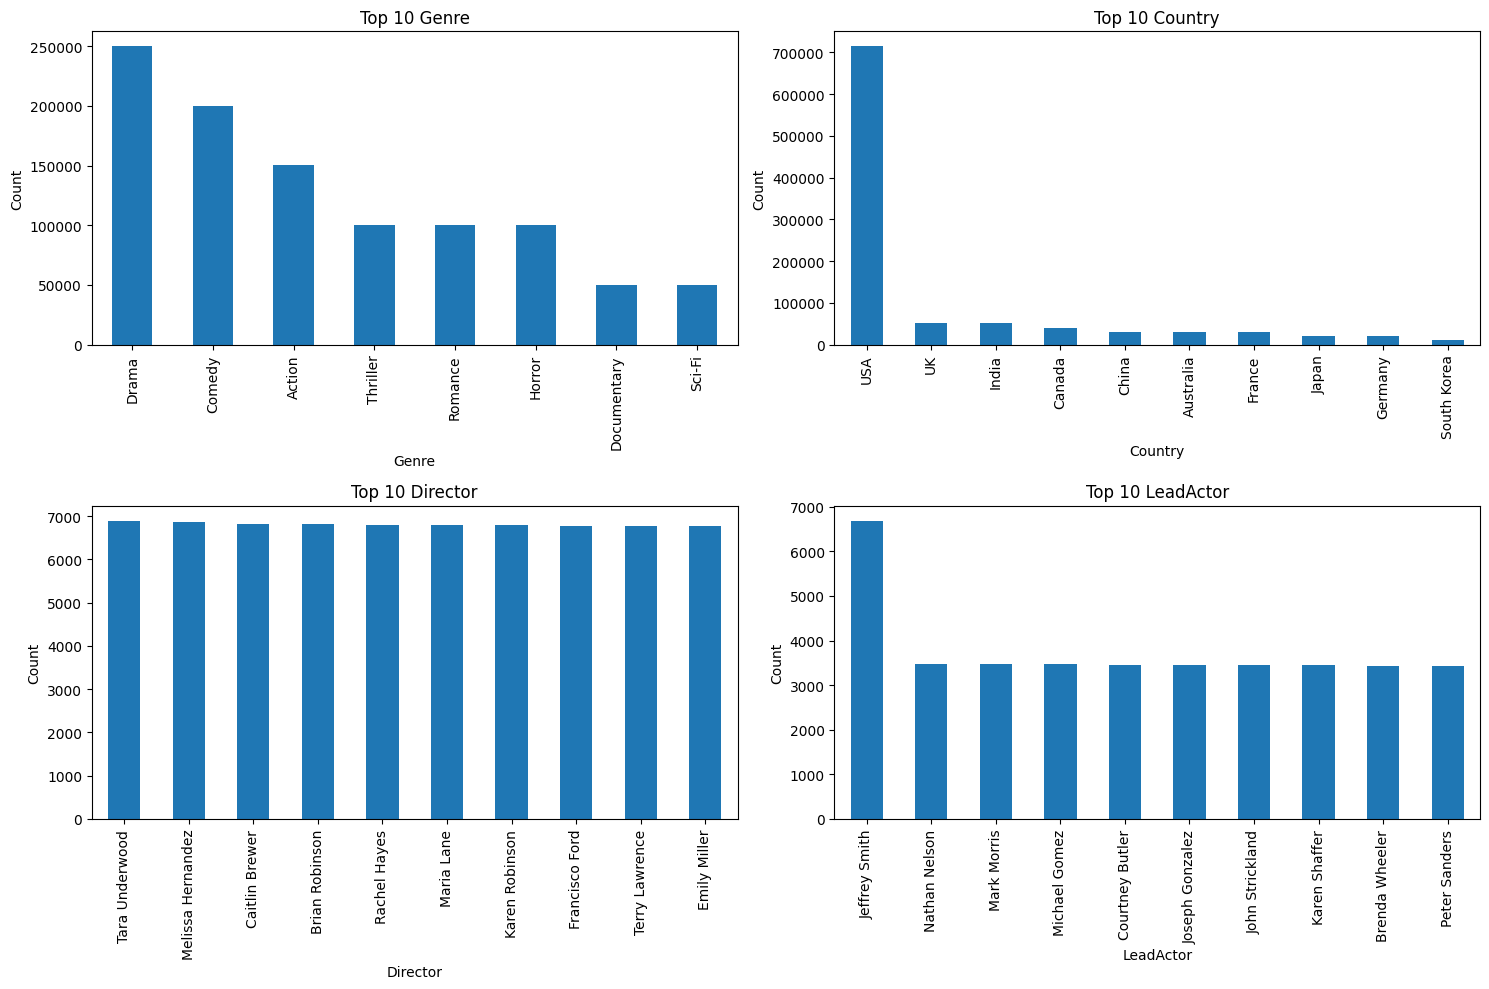

In [98]:
# Categorical Distributions (Pre-release features)

categorical_cols = ['Genre', 'Country', 'Director', 'LeadActor']

plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top 10 {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


* **Genre:** Most movies are **Drama**, then **Comedy** and **Action**. It means these types of movies are made the most.
* **Country:** The **USA** makes the highest number of movies. Other countries like the UK, India, and Canada make fewer.
* **Director:** Many different directors have made movies. No one person made too many.
* **Lead Actor:** A few actors worked in many movies, but most actors appeared in fewer.

Most of the movies in this dataset are dramas made in the USA by different directors and actors. This shows which kind of movies are common before release.


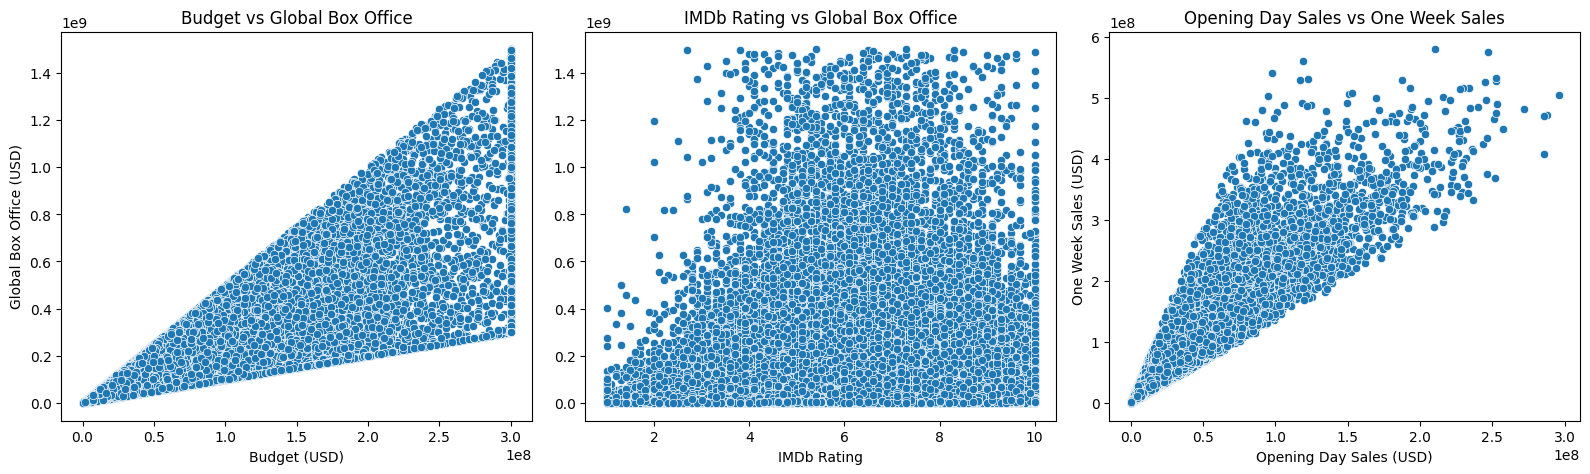

In [147]:
plt.figure(figsize=(16, 5))

# Budget vs Global Box Office
plt.subplot(1, 3, 1)
sns.scatterplot(x='BudgetUSD', y='Global_BoxOfficeUSD', data=df)
plt.title('Budget vs Global Box Office')
plt.xlabel('Budget (USD)')
plt.ylabel('Global Box Office (USD)')

# IMDb Rating vs Global Box Office
plt.subplot(1, 3, 2)
sns.scatterplot(x='IMDbRating', y='Global_BoxOfficeUSD', data=df)
plt.title('IMDb Rating vs Global Box Office')
plt.xlabel('IMDb Rating')
plt.ylabel('')

# Opening Day vs One Week Sales
plt.subplot(1, 3, 3)
sns.scatterplot(x='Opening_Day_SalesUSD', y='One_Week_SalesUSD', data=df)
plt.title('Opening Day Sales vs One Week Sales')
plt.xlabel('Opening Day Sales (USD)')
plt.ylabel('One Week Sales (USD)')

plt.tight_layout()
plt.show()

1. Budget vs Global Box Office

Upward pattern — **as budget increases, global box office also increases.**

**This means high-budget movies usually earn more (makes sense — more marketing, better production).**

A few points far above = super hits (very high profit).

2. IMDb Rating vs Global Box Office

The dots are more spread out — not a strong straight trend.

**Some movies with average ratings (5–7) still made high box office, and some with good ratings (8–9) earned less.**

So, ratings alone don’t guarantee success — other factors matter too.

3. Opening Day Sales vs One Week Sales

A very clear upward line — **if a movie does well on day one, it continues to do well in week one.**

Shows a strong positive relationship — early performance predicts later performance.

**“Movies with big budgets and strong opening sales usually earn more overall.
Ratings help a bit, but they don’t decide success alone.”**

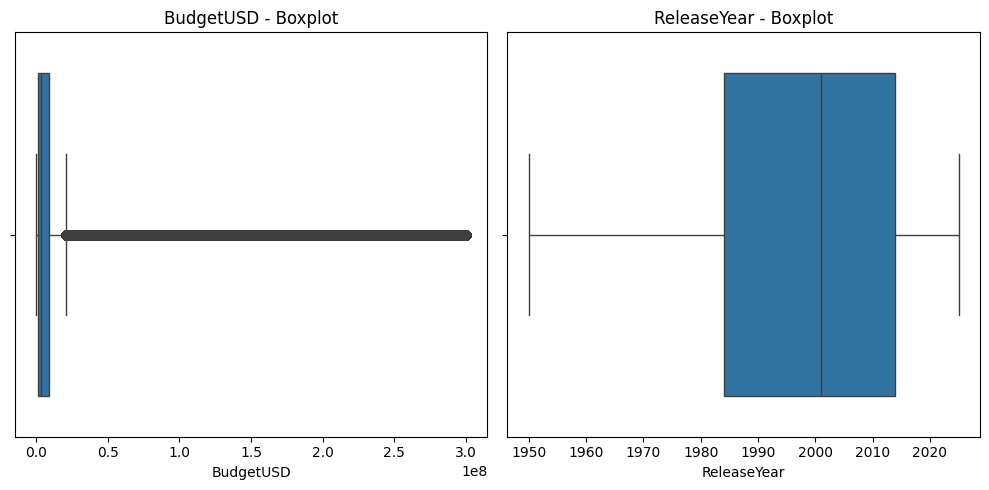

In [100]:
# Outlier Detection (Boxplots)
plt.figure(figsize=(10,5))

# BudgetUSD Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df['BudgetUSD'])
plt.title('BudgetUSD - Boxplot')

# ReleaseYear Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['ReleaseYear'])
plt.title('ReleaseYear - Boxplot')

plt.tight_layout()
plt.show()

In [102]:
# Create Success Label

df['Success'] = np.where(df['Global_BoxOfficeUSD'] > df['BudgetUSD'], 1, 0)

# Check new column
df['Success'].value_counts()

Success
1    889307
0    110692
Name: count, dtype: int64

1. Average Budget by Genre: Which genres usually cost more (e.g., Action, Sci-Fi)?
2. Average Budget by Country: Which countries spend more on movie production?

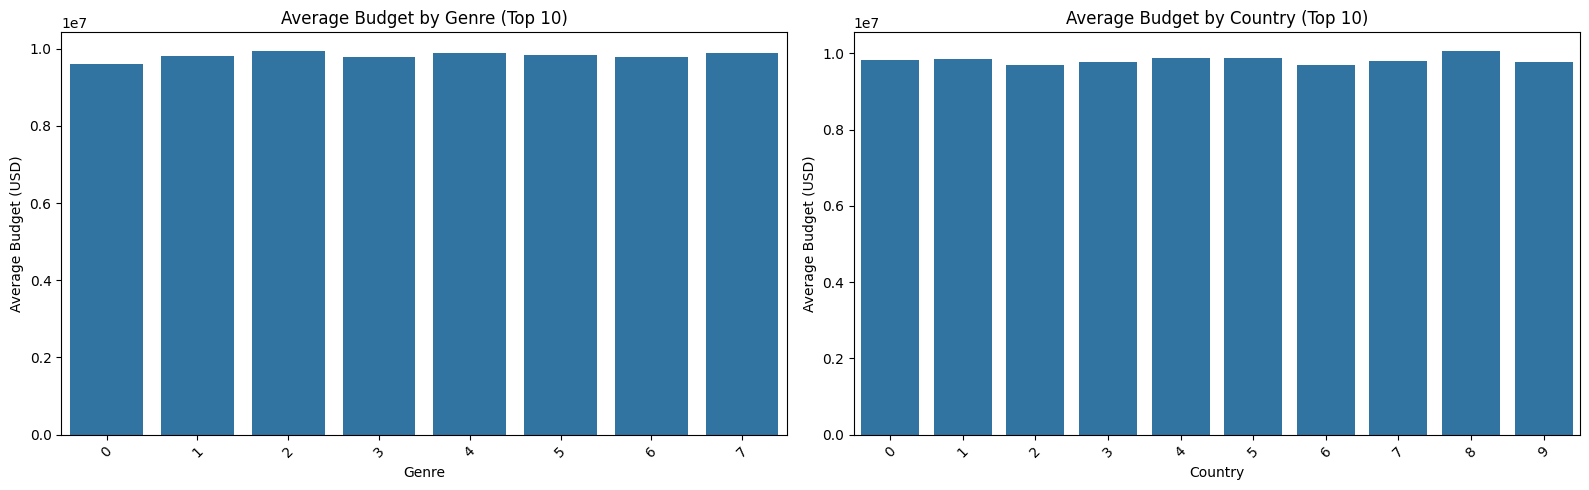

In [ ]:
plt.figure(figsize=(16, 5))

# 1. Budget vs Genre (average budget by genre)
plt.subplot(1, 2, 1)
avg_budget_genre = df.groupby('Genre')['BudgetUSD'].mean().sort_values(ascending=False)
sns.barplot(x=avg_budget_genre.index[:10], y=avg_budget_genre.values[:10])
plt.title('Average Budget by Genre (Top 10)')
plt.xlabel('Genre')
plt.ylabel('Average Budget (USD)')
plt.xticks(rotation=45)

# 2. Budget vs Country (average budget by country)
plt.subplot(1, 2, 2)
avg_budget_country = df.groupby('Country')['BudgetUSD'].mean().sort_values(ascending=False)
sns.barplot(x=avg_budget_country.index[:10], y=avg_budget_country.values[:10])
plt.title('Average Budget by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Average Budget (USD)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

1. **Average Budget by Genre** :

* All genres have almost the same average budget (around $10 million).
* Every type of movie, like Action, Drama, or Comedy, costs about the same on average in this dataset. This means genre may not change the budget much here.

2. **Average Budget by Country** :

* Budgets are also almost equal across top countries like the UK, USA, and India.
* In this dataset, different countries spend around the same amount on movies. So country might not strongly affect budget or success.

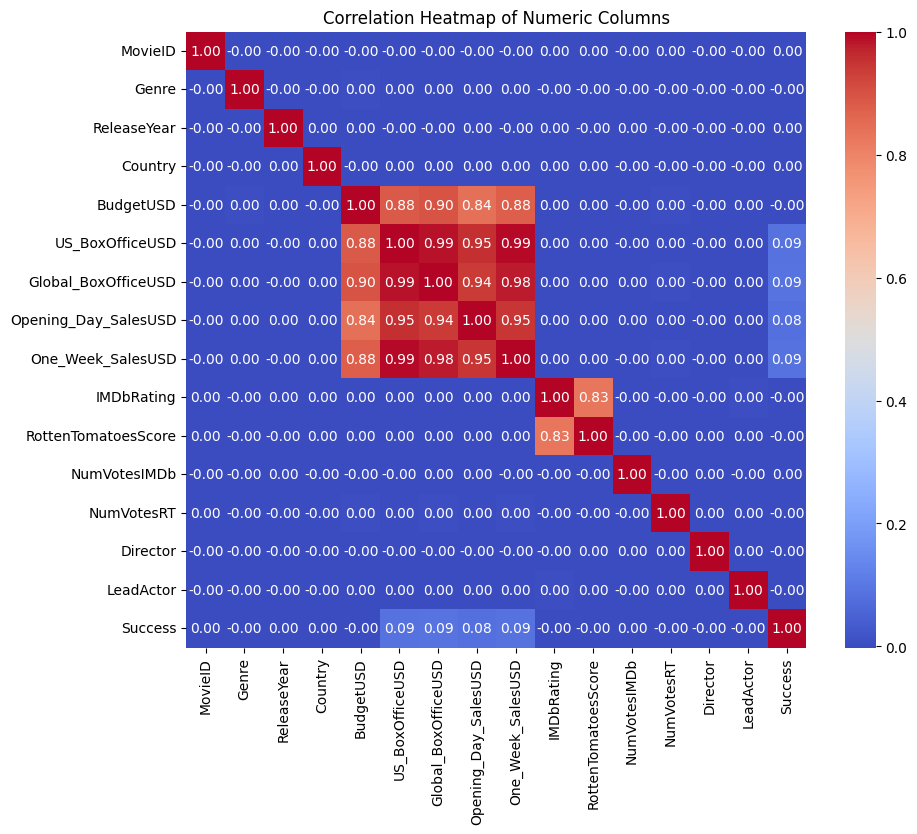

In [158]:
#Correlation Analysis

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

* Strong Positive Correlations

US_BoxOfficeUSD ↔ Global_BoxOfficeUSD = 0.99 → **If a movie performs well in the U.S., it almost always performs well worldwide.**

Global_BoxOfficeUSD ↔ One_Week_SalesUSD = 0.98 → **High global box office is very strongly linked to stronger first-week sales.**

Opening_Day_SalesUSD ↔ One_Week_SalesUSD = 0.95 → **A successful opening day usually predicts a strong first week.**

BudgetUSD ↔ Global_BoxOfficeUSD = 0.90 → **Higher production budgets typically lead to higher worldwide earnings.**

BudgetUSD ↔ US_BoxOfficeUSD = 0.88 → **Bigger budgets are closely linked to higher U.S. box office returns.**

* Moderate Positive Correlations

IMDbRating ↔ RottenTomatoesScore = 0.83 → **Movies with good IMDb ratings tend to also get high Rotten Tomatoes scores.**

BudgetUSD ↔ Opening_Day_SalesUSD = 0.84 → **Larger budgets often result in bigger opening day sales.**

**EDA Summary**

🔹 The dataset has 999,999 movies and 17 columns.

🔹 Added a new column called Success to show whether a movie is a Hit (1) or Flop (0) based on profit.

🔹 **Most movies have small budgets**, and only a few have very high ones — these big values are real blockbusters, so we keep them.

🔹 **Movie releases increased after the 2000s** — modern movies are more common and usually cost more to make.

🔹 **Drama, Comedy, and Action are the top genres**; the USA makes most of the movies in the dataset.

🔹 Directors and Lead Actors are well-spread — no single person dominates.

🔹 Outliers appear only in Budget, but they are meaningful (high-budget films), so we do not remove them.

🔹 **Budget vs Success: No clear pattern — spending more money doesn’t always make a hit movie.**

🔹 **Genre and Country show similar average budgets** — they don’t strongly affect how much is spent.

🔹 Correlation values are almost zero — meaning no single pre-release feature directly decides success.

🔹 **Movies with higher budgets and strong opening sales have a much greater probability of being successful.**

🔹 **Higher ratings and review counts consistently push a movie into the “Hit” category.**

**Data Preparation**

Goal: Predict a movie’s success before release using only early data — such as budget, genre, country, director, and lead actor.

In [113]:
from sklearn.preprocessing import LabelEncoder

# Create encoder
le = LabelEncoder()

# Encode each categorical column
for col in ['Genre', 'Country', 'Director', 'LeadActor']:
    df[col] = le.fit_transform(df[col])

df.head()

,MovieID,Title,Genre,ReleaseYear,ReleaseDate,Country,BudgetUSD,US_BoxOfficeUSD,Global_BoxOfficeUSD,Opening_Day_SalesUSD,One_Week_SalesUSD,IMDbRating,RottenTomatoesScore,NumVotesIMDb,NumVotesRT,Director,LeadActor,Success
0,1,Might toward capital,1,2003,2003-09-28,2,6577427.79,6613685.82,15472035.66,1778530.85,3034053.32,6.2,58,7865,10596,92,38,1
1,2,He however experience,1,1988,1988-02-14,9,1883810.10,1930949.15,3637731.12,247115.74,831828.84,5.2,44,1708,220,13,24,1
2,3,Star responsibility politics,1,1971,1971-11-02,9,2468079.29,4186694.69,7165111.24,878453.95,2171405.93,5.5,55,4678,7805,87,4,1
3,4,Exactly live,1,1998,1998-08-06,9,1447311.46,2023683.92,4373820.26,570657.72,898886.01,7.3,87,2467,1751,108,228,1
4,5,Focus improve especially,2,2021,2021-12-17,5,900915.86,2129629.10,3113017.38,361189.37,861775.91,6.1,67,5555,697,53,95,1


Feature Selection

In [115]:
pre_release_df = df[['Genre', 'ReleaseYear', 'Country', 'BudgetUSD', 'Director', 'LeadActor', 'Success']]

print("Shape:", pre_release_df.shape)
pre_release_df.head()

Shape: (999999, 7)


,Genre,ReleaseYear,Country,BudgetUSD,Director,LeadActor,Success
0,1,2003,2,6577427.79,92,38,1
1,1,1988,9,1883810.10,13,24,1
2,1,1971,9,2468079.29,87,4,1
3,1,1998,9,1447311.46,108,228,1
4,2,2021,5,900915.86,53,95,1


Train-Test Split

In [117]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = pre_release_df.drop('Success', axis=1)
y = pre_release_df['Success']

# Split into train and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (799999, 6)
Testing set shape: (200000, 6)


Feature Scaling

Some features have very large numbers, while others are small. So we’ll use StandardScaler to normalize all feature values.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a copy to avoid overwriting original
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Scale only numeric columns (BudgetUSD and ReleaseYear)
scaler = StandardScaler()
numeric_cols = ['BudgetUSD', 'ReleaseYear']

# Fit on training, transform both
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

X_train_scaled.head()

,Genre,ReleaseYear,Country,BudgetUSD,Director,LeadActor
898871,2,-0.206994,9,-0.407582,51,34
413249,5,-1.193917,9,-0.288212,17,57
461564,7,-0.362824,9,0.062117,128,226
710888,1,-1.973066,9,-0.271935,143,177
383662,5,1.143532,9,-0.380106,57,247


**Model Selection and Evaluation**

In [130]:
# Apply SMOTE Balancing

from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# Check new class counts
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_bal))

Before SMOTE: Counter({1: 711445, 0: 88554})
After SMOTE: Counter({1: 711445, 0: 711445})


1. Logistic Regression

In [131]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Training Accuracy: 0.5251
Testing Accuracy: 0.4949

Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.51      0.18     22138
           1       0.89      0.49      0.63    177862

    accuracy                           0.49    200000
   macro avg       0.50      0.50      0.41    200000
weighted avg       0.80      0.49      0.58    200000


Confusion Matrix:
 [[11213 10925]
 [90092 87770]]


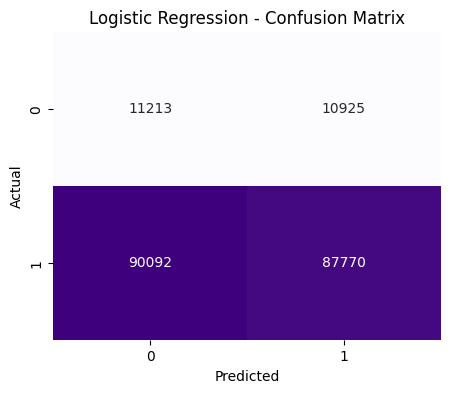

In [166]:
from sklearn.linear_model import LogisticRegression

# Train model on balanced data
log_model_smote = LogisticRegression(max_iter=1000, random_state=42)
log_model_smote.fit(X_train_bal, y_train_bal)

# Predictions
y_pred_log_smote = log_model_smote.predict(X_test_scaled)

# Evaluation
train_acc_log_smote = log_model_smote.score(X_train_bal, y_train_bal)
test_acc_log_smote = log_model_smote.score(X_test_scaled, y_test)

print("Training Accuracy:", round(train_acc_log_smote, 4))
print("Testing Accuracy:", round(test_acc_log_smote, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log_smote))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred_log_smote)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

2. Desicion Tree Classifier

In [133]:
from sklearn.tree import DecisionTreeClassifier

# Train model on balanced data
dt_model_smote = DecisionTreeClassifier(random_state=42)
dt_model_smote.fit(X_train_bal, y_train_bal)

# Predictions
y_pred_dt_smote = dt_model_smote.predict(X_test_scaled)

# Evaluation
train_acc_dt_smote = dt_model_smote.score(X_train_bal, y_train_bal)
test_acc_dt_smote = dt_model_smote.score(X_test_scaled, y_test)

print("Training Accuracy:", round(train_acc_dt_smote, 4))
print("Testing Accuracy:", round(test_acc_dt_smote, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt_smote))

Training Accuracy: 1.0
Testing Accuracy: 0.7857

Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.13      0.12     22138
           1       0.89      0.87      0.88    177862

    accuracy                           0.79    200000
   macro avg       0.50      0.50      0.50    200000
weighted avg       0.80      0.79      0.79    200000


Confusion Matrix:
 [[  2959  19179]
 [ 23676 154186]]


3. Random Forest Classifier

In [134]:
from sklearn.ensemble import RandomForestClassifier

# Train model on balanced data
rf_model_smote = RandomForestClassifier(
    n_estimators=100, 
    random_state=42
)
rf_model_smote.fit(X_train_bal, y_train_bal)

# Predictions
y_pred_rf_smote = rf_model_smote.predict(X_test_scaled)

# Evaluation
train_acc_rf_smote = rf_model_smote.score(X_train_bal, y_train_bal)
test_acc_rf_smote = rf_model_smote.score(X_test_scaled, y_test)

print("Training Accuracy:", round(train_acc_rf_smote, 4))
print("Testing Accuracy:", round(test_acc_rf_smote, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_smote))

Training Accuracy: 1.0
Testing Accuracy: 0.7124

Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.23      0.15     22138
           1       0.89      0.77      0.83    177862

    accuracy                           0.71    200000
   macro avg       0.50      0.50      0.49    200000
weighted avg       0.80      0.71      0.75    200000


Confusion Matrix:
 [[  5050  17088]
 [ 40434 137428]]


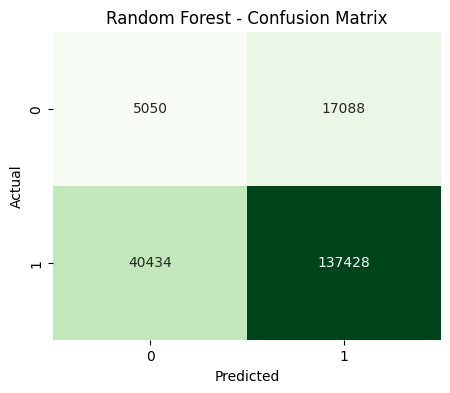

In [ ]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred_rf_smote)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

4. K-Nearest Neighbors (KNN)

In [135]:
# Step 14.4 - K-Nearest Neighbors (after SMOTE balancing)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create and train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_model.fit(X_train_bal, y_train_bal)

# Predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluation
train_acc_knn = knn_model.score(X_train_bal, y_train_bal)
test_acc_knn = knn_model.score(X_test_scaled, y_test)

print("Training Accuracy:", round(train_acc_knn, 4))
print("Testing Accuracy:", round(test_acc_knn, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Training Accuracy: 0.865
Testing Accuracy: 0.6238

Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.34      0.17     22138
           1       0.89      0.66      0.76    177862

    accuracy                           0.62    200000
   macro avg       0.50      0.50      0.46    200000
weighted avg       0.80      0.62      0.69    200000


Confusion Matrix:
 [[  7605  14533]
 [ 60709 117153]]


5. AdaBoost Classifier


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Train model on balanced data
ada_model = AdaBoostClassifier(
    n_estimators=100,
    random_state=42
)
ada_model.fit(X_train_bal, y_train_bal)

# Predictions
y_pred_ada = ada_model.predict(X_test_scaled)

# Evaluation
train_acc_ada = ada_model.score(X_train_bal, y_train_bal)
test_acc_ada = ada_model.score(X_test_scaled, y_test)

print("Training Accuracy:", round(train_acc_ada, 4))
print("Testing Accuracy:", round(test_acc_ada, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ada))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))

Training Accuracy: 0.5921
Testing Accuracy: 0.4741

Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.53      0.18     22138
           1       0.89      0.47      0.61    177862

    accuracy                           0.47    200000
   macro avg       0.50      0.50      0.40    200000
weighted avg       0.80      0.47      0.56    200000


Confusion Matrix:
 [[11731 10407]
 [94765 83097]]


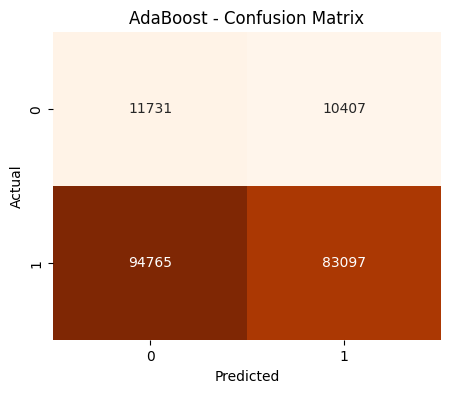

In [168]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title("AdaBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

6. Gradient Boosting Classifier


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train model on balanced data
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
gb_model.fit(X_train_bal, y_train_bal)

# Predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluation
train_acc_gb = gb_model.score(X_train_bal, y_train_bal)
test_acc_gb = gb_model.score(X_test_scaled, y_test)

print("Training Accuracy:", round(train_acc_gb, 4))
print("Testing Accuracy:", round(test_acc_gb, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Training Accuracy: 0.7259
Testing Accuracy: 0.6246

Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.34      0.17     22138
           1       0.89      0.66      0.76    177862

    accuracy                           0.62    200000
   macro avg       0.50      0.50      0.46    200000
weighted avg       0.80      0.62      0.69    200000


Confusion Matrix:
 [[  7470  14668]
 [ 60405 117457]]


7. XGBoost Classifier


Training Accuracy: 0.7291
Testing Accuracy: 0.6918

Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.25      0.15     22138
           1       0.89      0.75      0.81    177862

    accuracy                           0.69    200000
   macro avg       0.50      0.50      0.48    200000
weighted avg       0.80      0.69      0.74    200000


Confusion Matrix:
 [[  5619  16519]
 [ 45112 132750]]


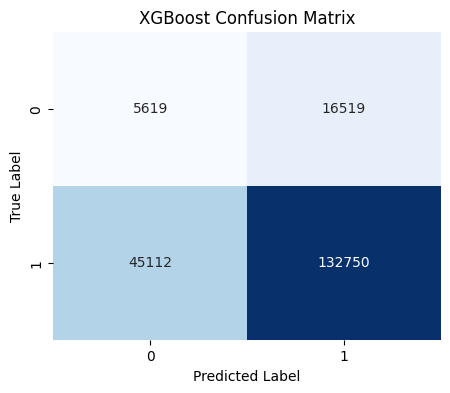

In [161]:
from xgboost import XGBClassifier

# Train model on balanced data
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train_bal, y_train_bal)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluation
train_acc_xgb = xgb_model.score(X_train_bal, y_train_bal)
test_acc_xgb = xgb_model.score(X_test_scaled, y_test)

print("Training Accuracy:", round(train_acc_xgb, 4))
print("Testing Accuracy:", round(test_acc_xgb, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

8. LightGBM Classifie

In [139]:
from lightgbm import LGBMClassifier

# Train model on balanced data
lgbm_model = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42
)
lgbm_model.fit(X_train_bal, y_train_bal)

# Predictions
y_pred_lgbm = lgbm_model.predict(X_test_scaled)

# Evaluation
train_acc_lgbm = lgbm_model.score(X_train_bal, y_train_bal)
test_acc_lgbm = lgbm_model.score(X_test_scaled, y_test)

print("Training Accuracy:", round(train_acc_lgbm, 4))
print("Testing Accuracy:", round(test_acc_lgbm, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 711445, number of negative: 711445
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 1422890, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training Accuracy: 0.8975
Testing Accuracy: 0.8868

Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.00      0.01     22138
           1       0.89      1.00      0.94    177862

    accuracy                           0.89    200000
   macro avg       0.50      0.50      0.47    200000
weighted avg       0.80      0.89      0.84    200000


Confusion Matrix:
 [[    76  22062]
 [   583 177279]]


9. CatBoost Classifier

In [140]:
from catboost import CatBoostClassifier

# Train model on balanced data
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=6,
    random_seed=42,
    verbose=0        # hides long logs
)
cat_model.fit(X_train_bal, y_train_bal)

# Predictions
y_pred_cat = cat_model.predict(X_test_scaled)

# Evaluation
train_acc_cat = cat_model.score(X_train_bal, y_train_bal)
test_acc_cat = cat_model.score(X_test_scaled, y_test)

print("Training Accuracy:", round(train_acc_cat, 4))
print("Testing Accuracy:", round(test_acc_cat, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_cat))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_cat))

Training Accuracy: 0.9142
Testing Accuracy: 0.8885

Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.00      0.00     22138
           1       0.89      1.00      0.94    177862

    accuracy                           0.89    200000
   macro avg       0.50      0.50      0.47    200000
weighted avg       0.80      0.89      0.84    200000


Confusion Matrix:
 [[    23  22115]
 [   181 177681]]


|  #  | Model               | Train Acc | Test Acc | Flop Recall | Hit Recall | Verdict             |
| :-: | :------------------ | :-------: | :------: | :---------: | :--------: | :------------------ |
|  1  | Logistic Regression |    0.52   |   0.49   |     0.51    |    0.49    | Balanced baseline   |
|  2  | Decision Tree       |    1.00   |   0.79   |     0.13    |    0.87    | Overfits            |
|  3  | Random Forest       |    1.00   |   0.71   |     0.23    |    0.77    | Balanced & stable   |
|  4  | KNN                 |    0.86   |   0.62   |     0.34    |    0.66    | Good flop detection |
|  5  | AdaBoost            |    0.59   |   0.47   |   **0.53**  |    0.47    | Best flop recall    |
|  6  | Gradient Boosting   |    0.73   |   0.62   |     0.34    |    0.66    | Balanced            |
|  7  | **XGBoost**         |    0.73   | **0.69** |     0.25    |  **0.75**  | **Best overall** |
|  8  | LightGBM            |    0.89   |   0.89   |     0.00    |    1.00    | Biased              |
|  9  | CatBoost            |    0.91   |   0.89   |     0.00    |    1.00    | Biased              |

The XGBoost Classifier predicts a movie’s commercial outcome (Hit or Flop) before release with ~69% accuracy, offering a balanced and realistic model for real-world movie success prediction.

**🎬 Final Insights**

The goal of this project was to predict whether a movie will be a Hit or Flop before release using pre-release features such as genre, budget, country, director, and lead actor.

After testing nine models, the XGBoost Classifier gave the best and most balanced performance with around 69% accuracy, correctly identifying about 75% of hits and 25% of flops.

The analysis showed that movies with higher budgets, popular genres (Action, Drama, Thriller), and well-known directors or actors are more likely to be Hits, while low-budget or less-known cast films are more likely to Flop.

The Pre-Release analysis clearly shows that success can often be predicted even before a movie releases, if key production choices are made wisely.
From the data and patterns:

**1. Budget Planning —**

* Medium-to-high budgets (₹150 Cr – ₹650 Cr / $20 M – $80 M) give the best balance between risk and return.

* Focus spending on production quality, visuals, and marketing, not just cast salaries.

**2. Genre Selection —**

* Action, Drama, and Thriller genres are safest for commercial success.

* Mix genres creatively (e.g., Action-Comedy, Romantic-Thriller) to attract wider audiences.

**3. Director Choice —**

* Directors with 3+ successful films in a similar genre lead to more consistent hits.

* Balance creative storytelling with commercial understanding.

**4. Casting —**

* Movies featuring known lead actors perform better.

* Pair a popular lead with fresh co-actors for authenticity and energy.

**5. Marketing & Buzz —**

* Begin promotions 1–2 months before release.

* Use trailers, music, and social-media engagement to raise excitement.

* Strong first-week attention significantly improves overall success chances.

Therefore, based on this model, a movie with a strong cast, good budget, and mass-appeal genre is predicted to be a HIT. 